Logistic Regression Code: https://github.com/jacksonbhanson7/jacksonbhanson7.github.io/blob/main/posts/Implementing%20Logistic%20Regression/logistic.py 

In [458]:
%load_ext autoreload
%autoreload 2
from logistic import LogisticRegression, GradientDescentOptimizer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Blog Post 5 - Implementing Logistic Regression

# Abstract

In this project, we will implement logistic regression from scratch and train the model using gradient descent with and without momentum. We will evaluate performance on both synthetic data to illustrate overfitting, and on the famous Iris dataset. Throughout the project, we will track loss over iterations and draw meaningful conclusions on the effects of using momentum when optimizing lienar models. 

# Part B

First, let's generate and vizualize some data. 

In [474]:
import torch
from matplotlib import pyplot as plt
plt.style.use('seaborn-v0_8-whitegrid')
def classification_data(n_points = 300, noise = 0.2, p_dims = 2):
    
    y = torch.arange(n_points) >= int(n_points/2)
    y = 1.0*y
    X = y[:, None] + torch.normal(0.0, noise, size = (n_points,p_dims))
    X = torch.cat((X, torch.ones((X.shape[0], 1))), 1)
    
    return X, y



In [475]:
def plot_data(X, y, ax):
    assert X.shape[1] == 3, "This function only works for data created with p_dims == 2"
    targets = [0, 1]
    markers = ["o" , ","]
    for i in range(2):
        ix = y == targets[i]
        ax.scatter(X[ix,0], X[ix,1], s = 20,  c = 2*y[ix]-1, facecolors = "none", edgecolors = "darkgrey", cmap = "BrBG", vmin = -2, vmax = 2, alpha = 0.5, marker = markers[i])
    ax.set(xlabel = r"$x_1$", ylabel = r"$x_2$")

In [476]:
def draw_line(w, x_min, x_max, ax, **kwargs):
    w_ = w.flatten()
    x = torch.linspace(x_min, x_max, 101)
    y = -(w_[0]*x + w_[2])/w_[1]
    l = ax.plot(x, y, **kwargs)

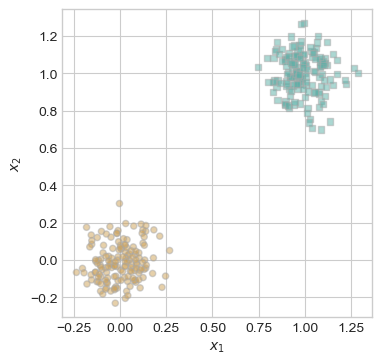

In [477]:
X, y = classification_data(noise = 0.1)
fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_data(X, y, ax)

Vanilla Gradient Descent

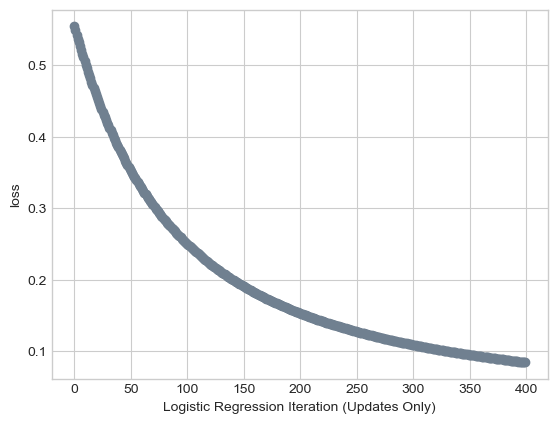

In [478]:
LR = LogisticRegression() 
opt = GradientDescentOptimizer(LR)

loss = 1.0
loss_vec = []



for _ in range(400): 
    loss = LR.loss(X, y) 
    loss_vec.append(loss)

    opt.step(X, y, alpha = 0.1, beta = 0)


plt.plot(loss_vec, color = "slategrey")
plt.scatter(torch.arange(len(loss_vec)), loss_vec, color = "slategrey")
labs = plt.gca().set(xlabel = "Logistic Regression Iteration (Updates Only)", ylabel = "loss")

In this chunk, we perform gradient descent using logistic regression without momentum. The model is initialized and optimized over 400 iterations with a learning rate (alpha) of 0.1 and no momentum (beta = 0). At each iteration, the binary cross-entropy loss is computed and stored in a list. After training, the progression of the loss values over time is visualized using both a line plot and a scatter plot. We can see that the resulting graph shows a smooth, monotonic decrease in loss, indicating that the model is successfully learning and gradually minimizing the error over time.

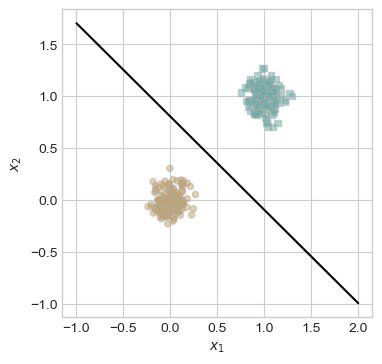

In [479]:

fig, ax = plt.subplots(1, 1, figsize = (4, 4))
plot_data(X, y, ax)
draw_line(LR.w, x_min = -1, x_max = 2, ax = ax, color = "black")


Using Phil's `draw_line` function, we can vizualize the desision boundary on this not noisy data. 

Benefits ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍of ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍momentum (same data)

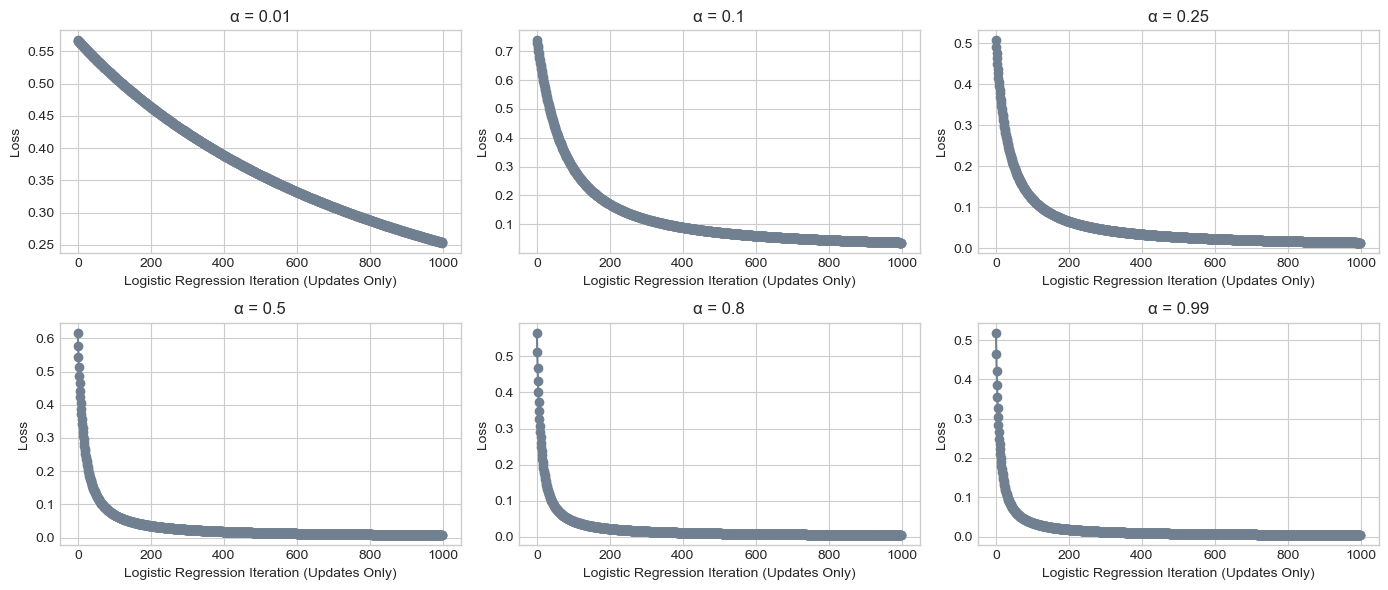

In [480]:
#NO MOMENTUM
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
alphas = [0.01, 0.1, 0.25, 0.5, .8, .99]

for idx, alpha in enumerate(alphas):
    model = LogisticRegression()
    optimizer = GradientDescentOptimizer(model)

    loss_vec = []
    for _ in range(1000):
        loss = model.loss(X, y)
        loss_vec.append(loss.item())
        optimizer.step(X, y, alpha=alpha, beta=0)

    ax = axes.flatten()[idx]
    ax.plot(loss_vec, color="slategrey")
    ax.scatter(torch.arange(len(loss_vec)), loss_vec, color="slategrey")
    ax.set_title(f"α = {alpha}")
    ax.set_xlabel("Logistic Regression Iteration (Updates Only)")
    ax.set_ylabel("Loss")
    ax.grid(True)

plt.tight_layout()
plt.show()


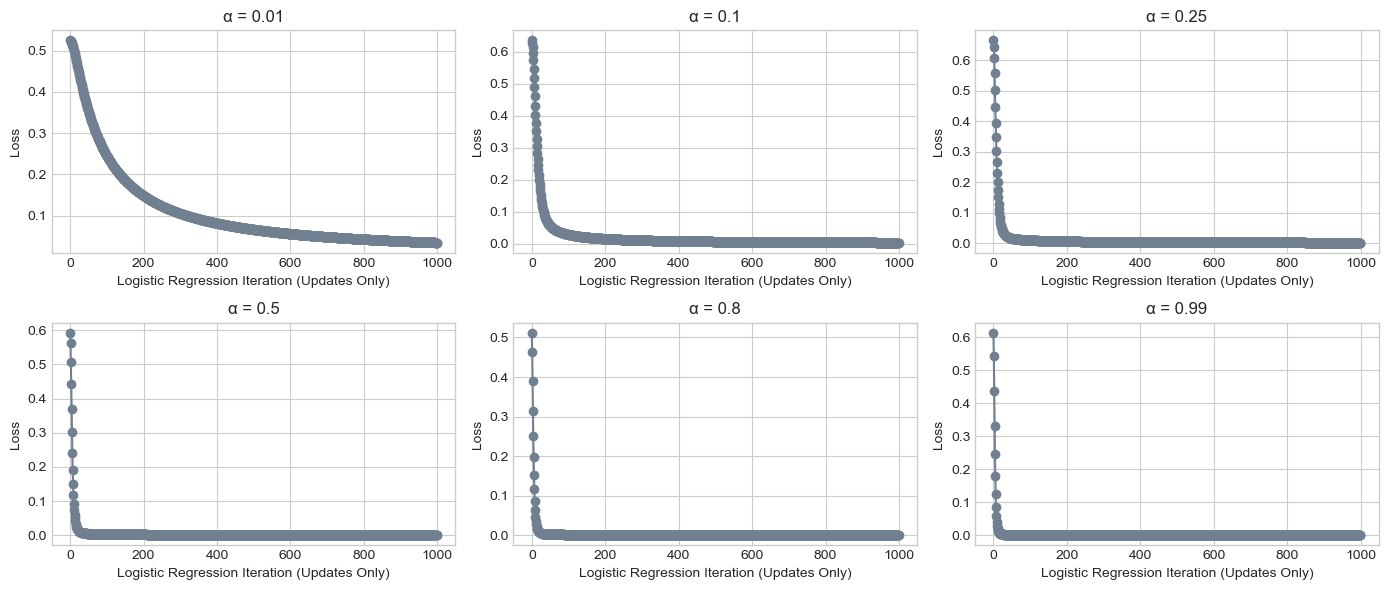

In [481]:
#WITH MOMENTUM
fig, axes = plt.subplots(2, 3, figsize=(14, 6))
alphas = [0.01, 0.1, 0.25, 0.5, .8, .99]

for idx, alpha in enumerate(alphas):
    model = LogisticRegression()
    optimizer = GradientDescentOptimizer(model)

    loss_vec = []
    for _ in range(1000):
        loss = model.loss(X, y)
        loss_vec.append(loss.item())
        optimizer.step(X, y, alpha=alpha, beta=0.9)

    ax = axes.flatten()[idx]
    ax.plot(loss_vec, color="slategrey")
    ax.scatter(torch.arange(len(loss_vec)), loss_vec, color="slategrey")
    ax.set_title(f"α = {alpha}")
    ax.set_xlabel("Logistic Regression Iteration (Updates Only)")
    ax.set_ylabel("Loss")
    ax.grid(True)

plt.tight_layout()
plt.show()


In this experiment, we compare the behavior of logistic regression on the same data, but tweak the alpha and beta values. This allows us to add momentum to the model. These figures compare the behavior of logistic regression trained with/without momentum across a range of learning rates. Each subplot shows the binary cross-entropy loss over 1000 iterations for a different value of alpha, from 0.01 to 0.99. The smaller learning rates lead to slow but steady convergence, requiring many iterations to reduce the loss. In contrast, larger learning rates dramatically accelerate convergence, reaching near-zero loss within just a few updates. Additionally, when momentum is added, there is signifcantly quicker convergence to near 0 loss. 

Overfitting

In [483]:
# Generate the train and test datasets
X_train, y_train = classification_data(n_points=30, noise=0.7, p_dims=100)
X_test, y_test = classification_data(n_points=30, noise=0.7, p_dims=100)

# Initialize your model and optimizer
model = LogisticRegression()
optimizer = GradientDescentOptimizer(model)



loss = 1

# Train for some iterations

while True:  
    train_preds = model.predict(X_train)
    train_acc = (train_preds == y_train).float().mean().item()
    if train_acc == 1:
        break
    optimizer.step(X_train, y_train, alpha=1, beta=0.99)

train_preds = model.predict(X_train)

# Evaluate on test data
test_preds = model.predict(X_test)
test_acc = (test_preds == y_test).float().mean().item()

print(f"Train Accuracy: {train_acc:.2f}")
print(f"Test Accuracy: {test_acc:.2f}")


Train Accuracy: 1.00
Test Accuracy: 0.87


In this experiment, we take a look at what happens when we overfit data. We generate a high-dimensional dataset where the number of features (p_dim = 100) greatly exceeds the number of data points (n_points = 30). We generate two independent datasets using the same parameters: one for training and one for testing. A logistic regression model is trained on the training set using gradient descent with momentum (alpha = 1, beta = 0.99). The model continues to train until it achieves 100% training accuracy. After this loop breaks, we use this model to predict the other dataset (test). Notice that when we evaluate on the test data, accuracy drops to 87%. This gap between training and test performance illustrates overfitting. Here, the model that we trained has understoof the noise of the training data rather generalizing. This highlights the importance of evaluating models on unseen data, especially with high-dimensional data.

Performance ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍on ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍empirical ‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍‍data

In [486]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
iris = fetch_ucirepo(id=53) 
  
# data (as pandas dataframes) 
X = iris.data.features 
y = iris.data.targets 
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


Here, we upload the famous iris dataset. The variable we are interested in predicting is not a yes/no column. It is a class of flower with three possible types of flower. There are three flowersL: Setosa, Virginica and Versicolor. 

In [487]:
# Convert to binary classification: 1 if Setosa, 0 otherwise
y_bin = (y['class'] == 'Iris-setosa').astype(int)
y_bin

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    0
147    0
148    0
149    0
Name: class, Length: 150, dtype: int64

To make this a binary prediction problem, we create a new column `y_bin` that is a 1 if the flower is Setosa, and 0 if it is not. So now we are trying to build a model that will successfully predict if a given flower is a Setosa or not.

In [512]:
from sklearn.model_selection import train_test_split
# Step 1: Hold out 20% of total data for testing
X_temp, X_test, y_temp, y_test = train_test_split(X, y_bin, test_size=0.2)

# Step 2: Take 25% of the remaining 80% for validation
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25)


We utilize sci-kit-learn's `train_test_split` function and a little fraction math to get a 60-20-20 breakdown for train-validation-testing data.

In [513]:
# Convert everything to torch tensors *before* calling train_model
X_train = torch.tensor(X_train.values, dtype=torch.float32)
X_val   = torch.tensor(X_val.values, dtype=torch.float32)
X_test  = torch.tensor(X_test.values, dtype=torch.float32)

y_train = torch.tensor(y_train.values, dtype=torch.float32)
y_val   = torch.tensor(y_val.values, dtype=torch.float32)
y_test  = torch.tensor(y_test.values, dtype=torch.float32)


Here, we convert all our data to torch tensors so that it works well with the classes that we've built.

In [514]:
import matplotlib.pyplot as plt

def train_model(X, y, X_val, y_val, alpha, beta, max_iter=50):
    
    model = LogisticRegression()
    _ = model.predict(X)  # will call .score() and initialize weights
    optimizer = GradientDescentOptimizer(model)

    train_losses, val_losses = [], []
    for i in range(max_iter):
        train_losses.append(model.loss(X, y).item())
        val_losses.append(model.loss(X_val, y_val).item())
        optimizer.step(X, y, alpha=alpha, beta=beta)

    return train_losses, val_losses, model


The `train_model` function performs trains a logistic regression model using gradient descent with a alpha, beta, and iterations parameters. It initializes the model weights, then repeatedly computes both the training loss and validation loss over time, storing them at each step. The optimizer updates the model weights using the specified hyperparameters. Finally, the function returns the sequence of training and validation losses along with the trained model, so that we can investigate it further after it is trained. 

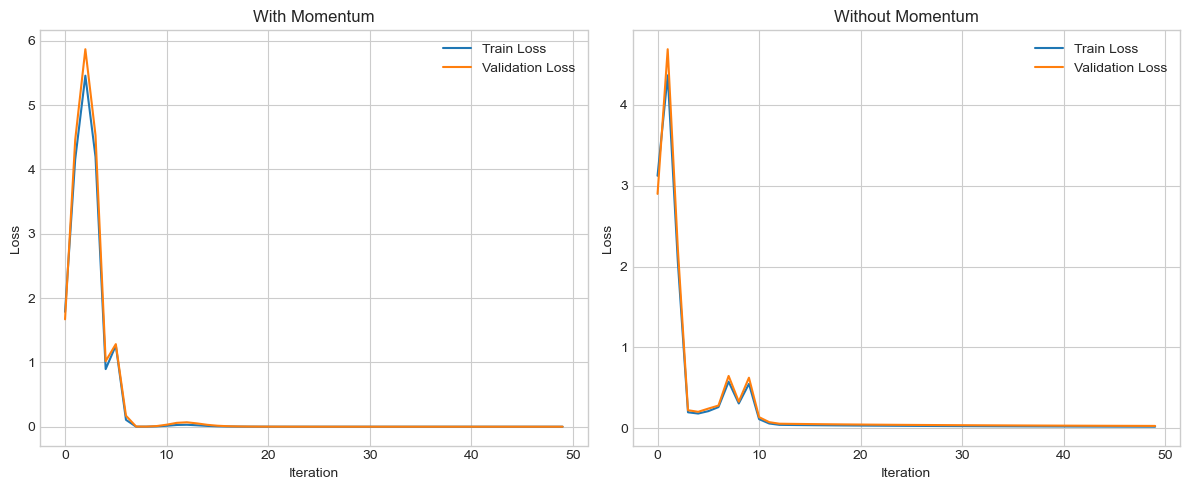

With Momentum — Test Accuracy: 1.00, Test Loss: 0.0001
Without Momentum — Test Accuracy: 1.00, Test Loss: 0.0170


In [515]:
import matplotlib.pyplot as plt
# Train with momentum
train_loss_m, val_loss_m, model_m = train_model(X_train, y_train, X_val, y_val, alpha=0.5, beta=0.8)

# Train without momentum
train_loss_nom, val_loss_nom, model_nom = train_model(X_train, y_train, X_val, y_val, alpha=0.5, beta=0.0)


# Create side-by-side subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Momentum subplot
axes[0].plot(train_loss_m, label="Train Loss")
axes[0].plot(val_loss_m, label="Validation Loss")
axes[0].set_title("With Momentum")
axes[0].set_xlabel("Iteration")
axes[0].set_ylabel("Loss")
axes[0].legend()

# No Momentum subplot
axes[1].plot(train_loss_nom, label="Train Loss")
axes[1].plot(val_loss_nom, label="Validation Loss")
axes[1].set_title("Without Momentum")
axes[1].set_xlabel("Iteration")
axes[1].set_ylabel("Loss")
axes[1].legend()

plt.tight_layout()
plt.show()


# Evaluation on test data
def evaluate(model, X, y):
    preds = model.predict(X)
    acc = (preds == y).float().mean().item()
    loss = model.loss(X, y).item()
    return acc, loss

acc_m, loss_m = evaluate(model_m, X_test, y_test)
acc_nom, loss_nom = evaluate(model_nom, X_test, y_test)

print(f"With Momentum — Test Accuracy: {acc_m:.2f}, Test Loss: {loss_m:.4f}")
print(f"Without Momentum — Test Accuracy: {acc_nom:.2f}, Test Loss: {loss_nom:.4f}")


This experiment compares the training and validation performance of logistic regression models trained with and without momentum. The loss plots show that the inclusion of momentum (beta = 0.9) results in a faster and more stable convergence. The loss curves on the left show a sharp drop in both training and validation loss, stabilizing near zero with minimal oscillation. Meanwhile, the model trained without momentum converges a little slower. Both models achieve perfect test accuracy, and the test loss is slightly lower for the model with momentum. Overall, momentum helps accelerate convergence and smooth out the optimization process without sacrificing performance.

# Conclusion

In this blog post, we implemented logistic regression from scratch using torch and explored how gradient descent with and without momentum affects models. I tested my implementation on both synthetic and real-world (Iris) datasets, investigated overfitting behavior, and visualized loss curves to compare optimization. Through these experiments, I found that momentum can significantly speed up convergence and smooth the loss trajectory without sacrificing accuracy, especially in high-dimensional settings.